In [70]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [71]:
df = pd.read_csv('Sunspots.csv')


In [72]:
df.drop(columns='Unnamed: 0', inplace=True)
df.drop(index=df[df["Monthly Mean Total Sunspot Number"] == 0].index,inplace=True)


In [73]:
df['Date'] = pd.to_datetime(df['Date'])


In [74]:
#df['Sunspot_lag12'] = df['Monthly Mean Total Sunspot Number'].shift(12)
df['Sunspot_lag1'] = df['Monthly Mean Total Sunspot Number'].shift(1)
df['Diff_11Year'] = df['Monthly Mean Total Sunspot Number'].diff(periods=11)
df['Diff_1Year']=df['Monthly Mean Total Sunspot Number'].diff(periods=1)
df['Rolling_11Yr'] = df['Monthly Mean Total Sunspot Number'].rolling(window=132, min_periods=1).mean()
df['Month'] = df['Date'].dt.month
df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)
df['Year'] = df['Date'].dt.year


df.dropna(inplace=True)

In [75]:
df.to_csv('Sunspots_new.csv', index=False)

In [76]:
features = [
    'Sunspot_lag1',
    
    'Diff_11Year',
    'Diff_1Year',
    'Month_sin',
    'Month_cos',
    'Year',
    'Rolling_11Yr'
]

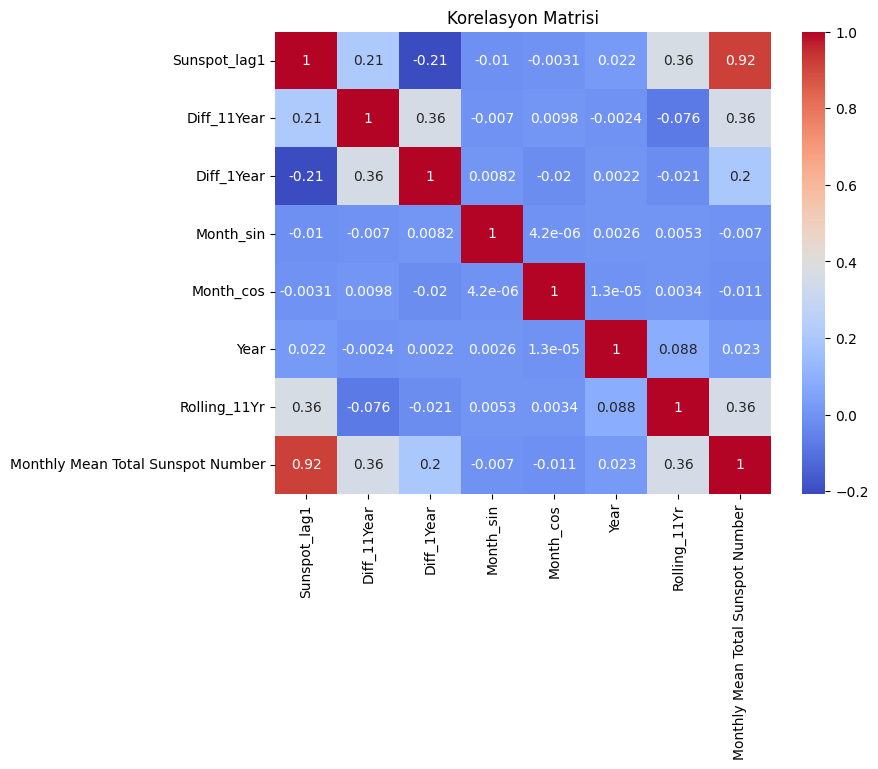

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df[features + ['Monthly Mean Total Sunspot Number']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Korelasyon Matrisi")
plt.show()


#Lightgbm
